# Лабораторная работа №5. Фильтрация изображения. Box-фильтр

In [4]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Прочитайте изображение из файла parrot.png (в градациях серого) и реализуйте Box-фильтрацию c помощью интегрального изображения. Дополнять изображение не нужно (в результате оно уменьшится). Для этого:

1. Получите интегральное изображение (skimage.transform.integral_image).
2. На основе интегрального изображения сделайте Box-фильтрацию.

Возьмите ядро фильтра размером $ 20 \times 20$. Результат выведите на экран.

In [3]:
# Код тут

Задание №2. Прочитайте изображение из файла img_2.png. Примените к нему выравнивание гистограммы, чтобы функция распределения имела вид близкий к линейному:


In [3]:
img = imread('parrot.png', as_grey = True)

/home/vasily/.virtualenvs/cv/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


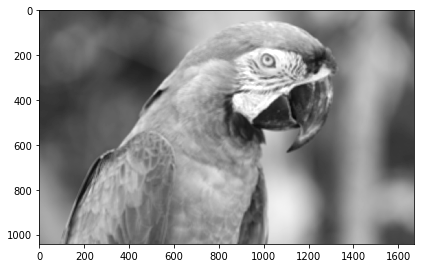

In [26]:
k = 10
int_img = integral_image(img)
img_new = np.ones((img.shape[0] - k + 1, img.shape[1] - k + 1), dtype = np.float)
for x in np.arange(k // 2, img.shape[1] - k // 2):
    for y in np.arange(k // 2, img.shape[0] - k // 2):
        if x == k // 2 and y == k // 2:
            img_new[y - k // 2 , x - k // 2] = int_img[y + k // 2, x + k // 2] / (k ** 2)
        elif y == k // 2:
            img_new[y - k // 2 , x - k // 2] = (int_img[y + k // 2, x + k // 2] - 
                                                int_img[y + k // 2, x - k // 2 - 1]) / (k ** 2)
        elif x == k // 2:
            img_new[y - k // 2 , x - k // 2] = (int_img[y + k // 2, x + k // 2] - 
                                                int_img[y - k // 2 - 1, x + k // 2]) / (k ** 2)
        else:
            img_new[y - k // 2 , x - k // 2] = (int_img[y + k // 2, x + k // 2] + 
                                                int_img[y - k // 2 - 1, x - k // 2 - 1] -
                                                int_img[y + k // 2, x - k // 2 - 1] -
                                                int_img[y - k // 2 - 1, x + k // 2]) / (k ** 2)
imshow(img_as_ubyte(np.clip(img_new, 0, 1)))